# Machine Learning Model for Cricket Score Prediction 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None) 

In [2]:
data = pd.read_csv('bpl_data.csv')
data.head(2)

,Date,Batting Team,Bowling Team,Striker,Non-Striker,Bowler,Innings,Unique,Over Number,Over Ball,Runs,Wides,Team Runs,Remaining Overs,Lead By,Trail By,Fall Of Wickets,Day,Session,Leg Byes,No Balls,Balls,Byes,Remaining Balls,Remaining Runs,Run Rate,Batter Sixes,Batter Runs,Batter Fours,Batter Balls,Batter Total Runs,Dismissal Type,Dismissal Fielder,On Field Minutes
0,2025-1-18 19:00:00,Rangpur Riders,Chittagong Kings,Tawfique Khan,Steven Taylor,Binura Fernando,1,0.1,1,1,0,0,0,19.5,0,0,0,1,1,0,0,1,0,119,NaN,0.0,0,0,0,1,0,NaN,NaN,0
1,2025-1-18 19:00:00,Rangpur Riders,Chittagong Kings,Tawfique Khan,Steven Taylor,Binura Fernando,1,0.2,1,2,0,0,0,19.4,0,0,0,1,1,0,0,2,0,118,NaN,0.0,0,0,0,2,0,NaN,NaN,0


## Step: Feature Engineering
+ Prepare the dataset to extract features relevant for score prediction:

+ Calculate current run rate.
+ Include remaining overs, wickets lost, and current score.
+ Extract time-based features like Day and Session.

In [3]:
# Create key features
data['Current Run Rate'] = data['Team Runs'] / (20 - data['Remaining Overs'])
data['Wickets Lost'] = 10 - data['Fall Of Wickets']
data['Projected Score'] = data['Team Runs'] + (data['Current Run Rate'] * data['Remaining Overs'])

# Select important columns for the model
features = ['Remaining Overs', 'Wickets Lost', 'Current Run Rate', 'Team Runs']
target = 'Projected Score'

# Filter for innings-specific rows if required
innings_data = data[data['Innings'] == 1]  # Adjust if for second innings

## Step: Split the Dataset
+ Split the dataset into training and testing sets.

In [4]:
X = innings_data[features]
y = innings_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step: Train the Model
+ Use a RandomForestRegressor for training. This model performs well for tabular cricket data.

In [6]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Step: Evaluate the Model
+ Check the model's performance using Mean Squared Error (MSE).


Model Evaluation:
Mean Squared Error (MSE): 5.57
Prediction Accuracy (R²): 99.70%


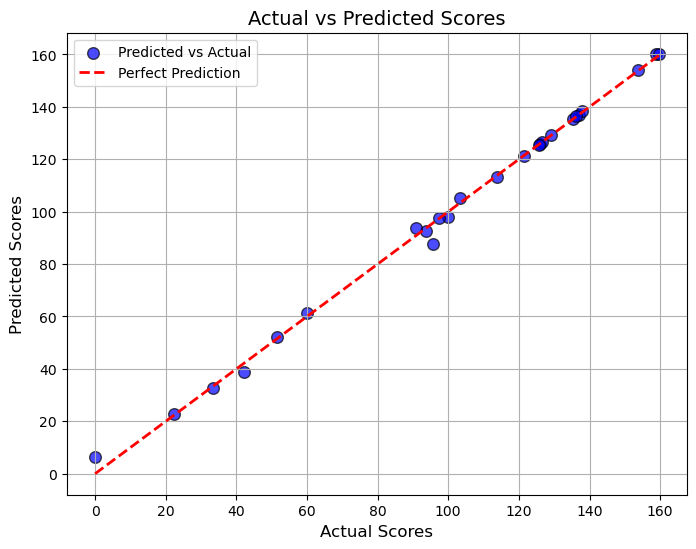


Interpretation:
1. The model explains approximately 99.70% of the variance in the scores.
2. Blue points represent the predicted scores vs actual scores.
3. The red dashed line indicates perfect prediction. The closer points are to this line, the better the model.


In [43]:
# Function to evaluate the model and calculate prediction accuracy
def evaluate_model_with_accuracy(model, X_test, y_test):
    """
    Evaluate the model's performance, calculate accuracy, and display metrics and plots.
    Args:
        model: Trained regression model.
        X_test: Test set features.
        y_test: Actual scores for the test set.
    Returns:
        None
    """
    # Make predictions
    predictions = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)

    # Calculate R-squared (R²) score for accuracy
    r2 = r2_score(y_test, predictions)
    accuracy = r2 * 100  # Convert R² to percentage

    # Print metrics
    print(f"\nModel Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Prediction Accuracy (R²): {accuracy:.2f}%")

    # Plot actual vs predicted scores
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7, s=70, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
    
    # Add labels, title, and legend
    plt.xlabel("Actual Scores", fontsize=12)
    plt.ylabel("Predicted Scores", fontsize=12)
    plt.title("Actual vs Predicted Scores", fontsize=14)
    plt.legend(loc='upper left', fontsize=10)  # Add legend
    plt.grid(True)
    plt.show()

    # Print tips for interpretation
    print("\nInterpretation:")
    print(f"1. The model explains approximately {accuracy:.2f}% of the variance in the scores.")
    print("2. Blue points represent the predicted scores vs actual scores.")
    print("3. The red dashed line indicates perfect prediction. The closer points are to this line, the better the model.")

# Example usage
evaluate_model_with_accuracy(model, X_test, y_test)

## Step: Predict Final Score
+ For the current match scenario, create a new input and use the model to predict.

In [44]:
# Create a feature vector for the current match
current_match = pd.DataFrame({
    'Remaining Overs': [20 - 8],  # Overs remaining
    'Wickets Lost': [4],         # Wickets lost
    'Current Run Rate': [61 / 8], # Current run rate
    'Team Runs': [61]            # Current score
})

# Predict the final score
predicted_score = model.predict(current_match)
print(f"Predicted Final Score: {predicted_score[0]:.2f}")

Predicted Final Score: 140.22
